<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Feature Scaling

_Authors: Kiefer Katovich (SF), Joseph Nelson (DC)_

---

### Learning Objectives
- Explain the benefits of scaling data.
- Identify situations in which scaling data is beneficial. 
- Scale data using Python and scikit-learn.

### Lesson Guide
- [Introduction to Feature Scaling](#intro)
- [Why Scale Data?](#why-scale)
- [Centering](#centering)
- [Standardization](#standardization)
    - [Standardizing with scikit-learn's `StandardScaler`](#standard-scaler)
- [Normalization](#normalization)
    - [Normalizing With scikit-learn's `MinMaxScaler`](#minmax)
- [Independent Practice Scaling the Wine Data Set](#independent-practice)
- [Additional Resources](#resources)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='intro'></a>

## Introduction to Feature Scaling

---

Scaling data is the process of increasing or decreasing its magnitude according to a fixed ratio. In other words, you change the size but not the shape of the data (the shape of the distribution remains unchanged).

Some data scaling methods often change the *location* of the data as well. For example, when "centering" we take a distribution and change its mean to zero by subtracting the mean of the distribution from each data point in the distribution. While this is not technically "scaling," changing the location is often part of the process and preserves the shape of the data set (it just shifts it around).


<a id='why-scale'></a>

## Why Should We Scale Data?

---

**There are a number of good reasons to scale our data:**
- To handle disparities in units.
- To cut computational expense.
- To improve model performance (especially for machine learning).
- We scale for models to prevent the steps on different axes from varying widely.

**It’s rarely a bad idea to scale your data.** 

<a id='centering'></a>

## Centering: Changing the Location of Data

---

Let's start with the simplest transformation example — centering. If we have a distribution of values ($X$), then to center our data to a new distribution ($X_c$) we apply the following formula:

### $$ X_c = X - \bar{X} $$

### Benefits of Centering Data

In linear modeling, the primary benefit of centering your predictor data is that **the intercept now represents the estimate of the target when all predictors are at their mean value.**

If we don't center, the intercept is the estimate of our model when all predictors are at value 0. When you center your predictors, it often makes the intercept much more interpretable.

### Centering Example: Baseball Player Height and Weight

Load in the data set containing the heights, weights, and ages of baseball players.

In [2]:
baseball = pd.read_csv('../datasets/baseball_height_weight.csv')
baseball.columns

Index(['name', 'team', 'position', 'height_in', 'weight_lb', 'age'], dtype='object')

**Plot the distribution of the heights and weights below:**

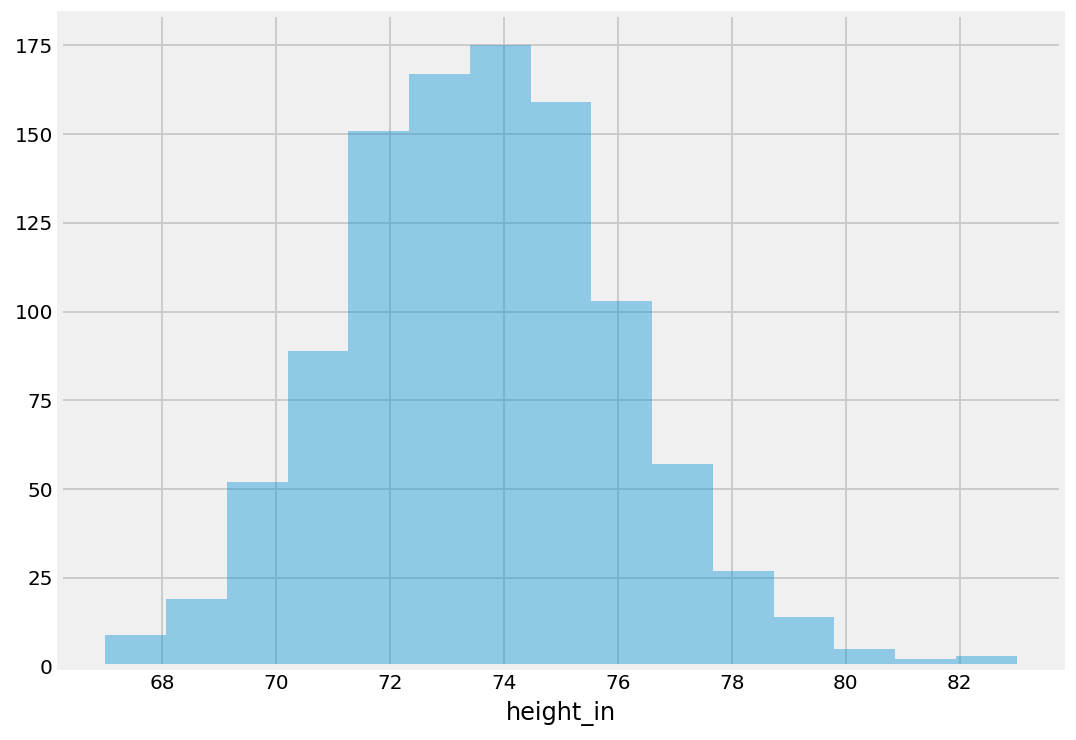

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(baseball.height_in, bins=15, kde=False)

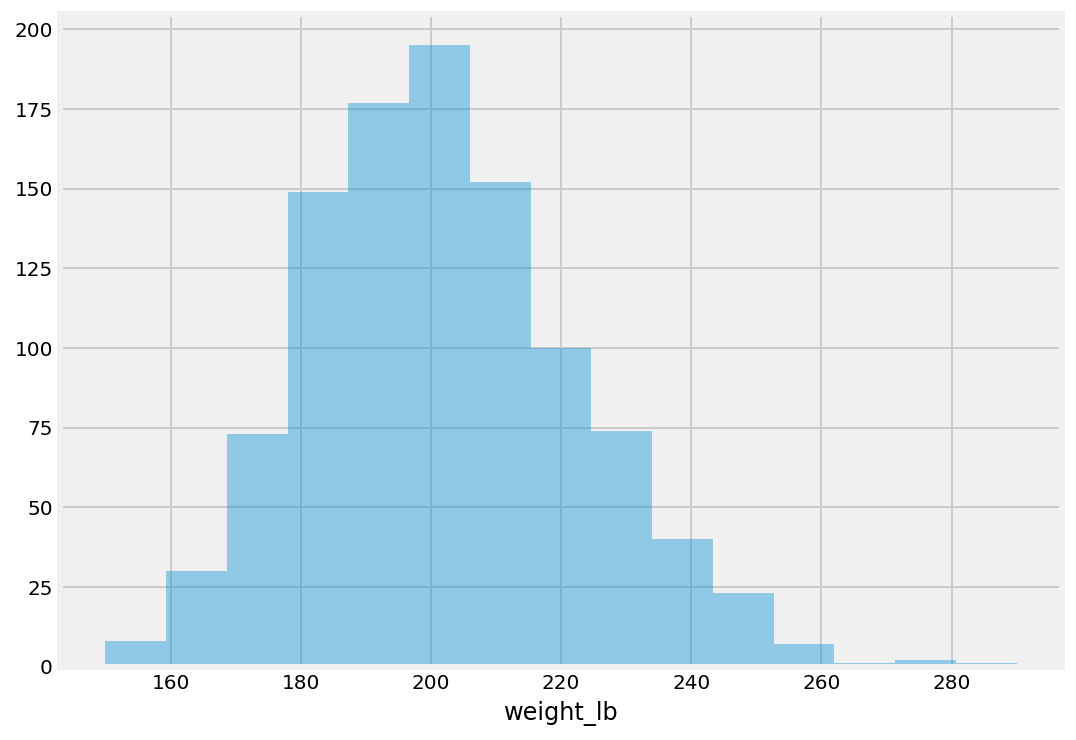

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(baseball.weight_lb, bins=15, kde=False)

**Construct a linear regression predicting weight from height. Interpret the value of the intercept and the coefficient from this model.**

In [6]:
from sklearn.linear_model import LinearRegression
import patsy

# We can use Patsy to quickly create data from the columns in a DataFrame.
# Because we're going to use scikit-learn, we typically remove the intercept Patsy puts in automatically.
y, X = patsy.dmatrices('weight_lb ~ height_in -1', data=baseball, return_type='dataframe')
y = y.values.ravel()


linreg = LinearRegression()
linreg.fit(X, y)
print('Intercept:', linreg.intercept_)
print('Height coef:', linreg.coef_)


Intercept: -154.89318451498087
Height coef: [4.83820825]


In [7]:
# The intercept, in this case -154, represents the estimated weight of a baseball player when their height is 0 inches.
# The height coefficient of 4.8 represents the number of pounds more a player is estimated to weigh for each one-inch increase in height.

**Center the height variable and rerun the regression with the centered height. Interpret the new intercept and coefficient.**

In [8]:
baseball['height_ctr'] = baseball.height_in - baseball.height_in.mean()

# Because we are going to use scikit-learn, we remove the intercept Patsy puts in automatically.
y, X = patsy.dmatrices('weight_lb ~ height_ctr -1', data=baseball, return_type='dataframe')
y = y.values.ravel()

linreg = LinearRegression()
linreg.fit(X, y)
print('Intercept:', linreg.intercept_)
print('Height centered coef:', linreg.coef_)

Intercept: 201.67151162790697
Height centered coef: [4.83820825]


In [9]:
print(np.mean(baseball.height_in))

73.69767441860465


In [ ]:
# The intercept, 201, is the estimated weight of a baseball player of AVERAGE height (73.69 in).
# The height coefficient of 4.8 is the number of pounds more a player is estimated to weigh for each
# inch of height. This does not change.

<a id='standardization'></a>

## Standardization

---

The most common method of scaling is standardization. In standardization, we first center the data and then divide by the standard deviation to enforce that the standard deviation of the variable is one:

### $$ X_{std} = \frac{X - \bar{X}}{s_{X}} $$

### Benefits of Standardizing Data

There are many benefits to standardizing our data, especially when we have more than one predictor:
- Intercepts are interpreted as the estimate when all predictors are at their mean value.
- Coefficients are in units of standard deviations of the original predictors. This allows for direct comparison of the magnitude of impact between different predictors.
- Optimization methods (minimizing loss functions) are faster and more stable.
- It is required for regularization penalties where the magnitude of coefficients for different predictors must have the same meaning.
- In K-nearest neighbors (KNN) methods, it is necessary if you want features to contribute equally, as these models use the distance between observations calculated from the features.
- K-means clustering is affected by the scale of the data, so standardizing the features will prevent variables from dominating simply based on their scale.
- In logistic regression, neural networks, and support vector machines, unscaled data can result in a disproportionate effect of some data points over others.

> **Note:** In ordinary linear regression, centering and scaling your variables does *not* impact the amount of variance for which you can account. This is because we are only moving and adjusting the magnitude of the distribution; the shape of the distribution does not change.

### Standardization Example

First, plot the original `height` variable against the `weight` variable. Use seaborn's `sns.jointplot`. 

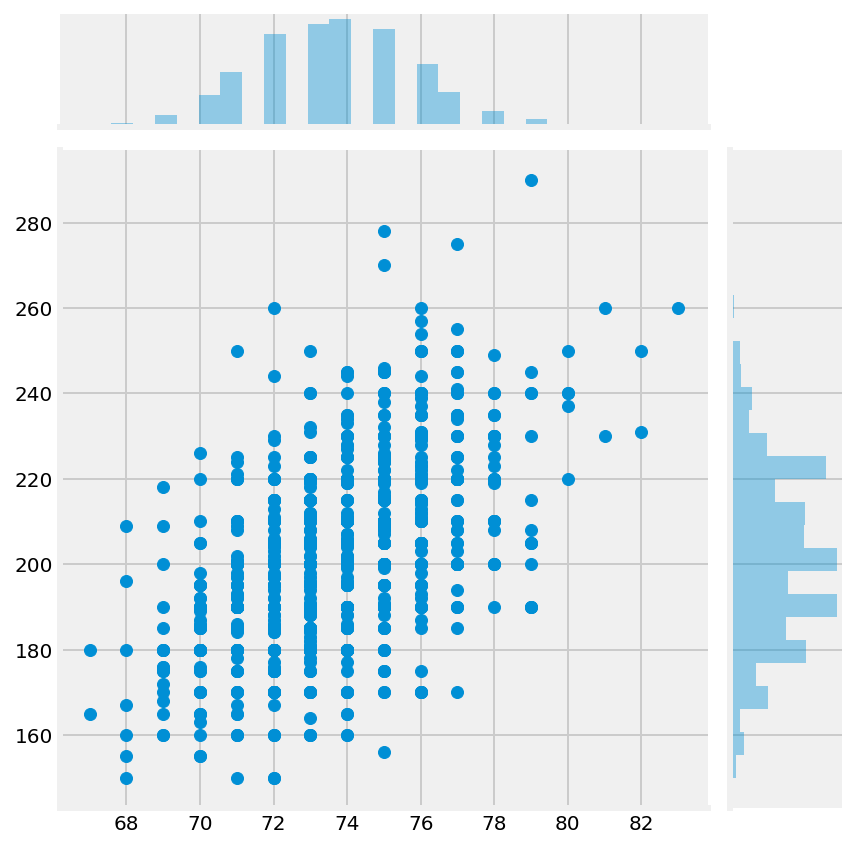

In [10]:
sns.jointplot(baseball.height_in.values, baseball.weight_lb.values)

**Create standardized versions of the height and weight variables.**

In [11]:
baseball['height_std'] = (baseball.height_in - baseball.height_in.mean()) / baseball.height_in.std()
baseball['weight_std'] = (baseball.weight_lb - baseball.weight_lb.mean()) / baseball.weight_lb.std()

**Plot the standardized weight against the height. Notice the distribution shapes and relationship between the variables is unchanged.**

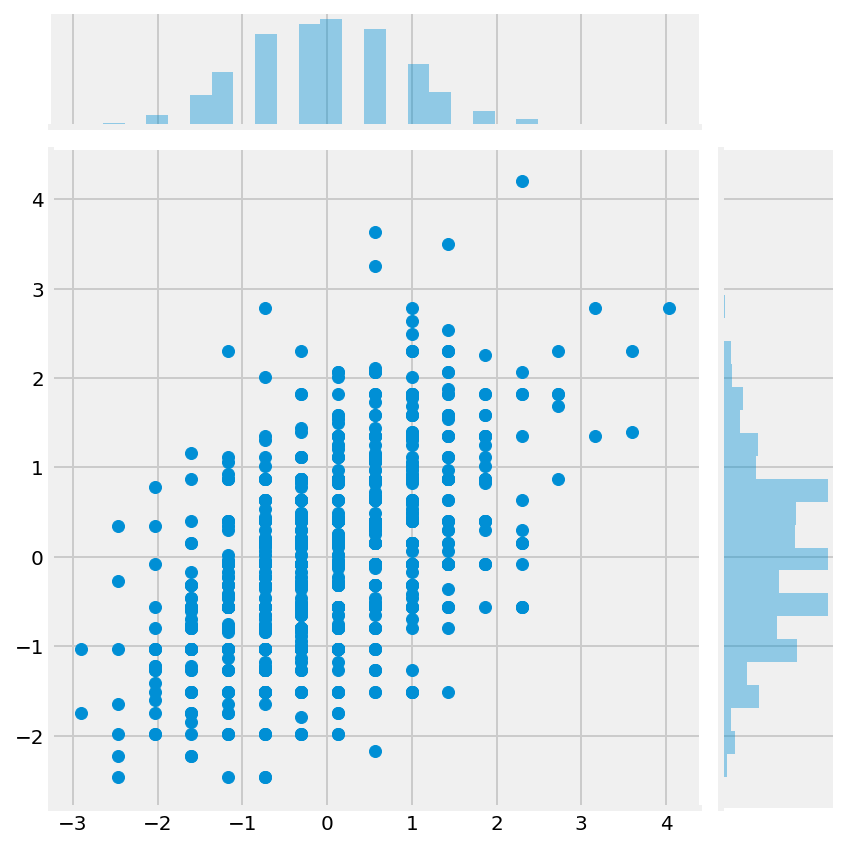

In [12]:
sns.jointplot(baseball.height_std.values, baseball.weight_std.values)

<a id='standard-scaler'></a>
### Standardizing with scikit-learn's `StandardScaler`

Scikit-learn comes packaged with a class, `StandardScaler`, that will perform the standardization on a matrix for you. 

Load in the package like so:

```python
from sklearn.preprocessing import StandardScaler
```

Once instantiated, the `StandardScaler` object has three primary built-in methods:
- `.fit(X)` will calculate the mean and standard deviations for each column of X.
- `.transform(X)` will take X and return a transformed version of X where each column is standardized according to their means and standard deviations (you must have run `.fit()` first).
- `.fit_transform(X)` combines the `.fit()` method and the `.transform()` method.

**Use `StandardScaler` to standardize a predictor matrix containing heights and weights from the baseball data.**

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler.
ss = StandardScaler()

# Fit the data using the scaler (scale the data).
Xstd = ss.fit_transform(baseball[['height_in','weight_lb']].values)
print(Xstd.mean(), Xstd.std())

7.659678231909995e-16 0.9999999999999998


**Build a linear regression predicting age from the standardized height and weight data. Interpret the coefficients.**

In [14]:
lr = LinearRegression()
lr.fit(Xstd, baseball.age.values)

print('Intercept:', lr.intercept_)
print('Coefs:', lr.coef_)

Intercept: 28.73415697674419
Coefs: [-0.95285142  1.18796454]


In [ ]:
# A one-standard-deviation increase in height estimates -0.95 years age.
# A one-standard-deviation increase in weight estimates 1.18 years age.

<a id='normalization'></a>

## Normalization

---

Normalization most often refers to the process of "normalizing" a variable to exist between 0 and 1. Think of it as squishing the variable to restrict it to a specific range.

### $$ X_{norm} = \frac{X - min(X)}{max(X) - min(X)} $$

This type of normalization is typically referred to as "min-max scaling." 

### Benefits of Normalization

Typically, standardization is preferred to min-max normalization. However, there are some applications where min-max scaling is preferable:
- In neural networks, for example, which often require their inputs to be bounded between 0 and 1. 
- In images where pixels can only take on a specific range of RGB values.

<a id='minmax'></a>
### Normalization with `MinMaxScaler`

Scikit-learn also has a class for normalization called `MinMaxScaler`:

```python
from sklearn.preprocessing import MinMaxScaler
```

The `MinMaxScaler` has the same `fit()`, `transform()`, and `fit_transform()` methods.

**Normalize the `age`, `height`, and `weight` variables using `MinMaxScaler.`**

In [15]:
from sklearn.preprocessing import MinMaxScaler

X = baseball[['age','height_in','weight_lb']]

mms = MinMaxScaler()
Xn = mms.fit_transform(X)

**Look at the min and max ranges for the normalized matrix.**

In [16]:
print( Xn.min(axis=0))
print( Xn.max(axis=0))

[0. 0. 0.]
[1. 1. 1.]


In [17]:
print( Xn.std(axis=0))

[0.15643887 0.14412335 0.14988388]


**Plot the normalized `height` against the normalized `weight`.**

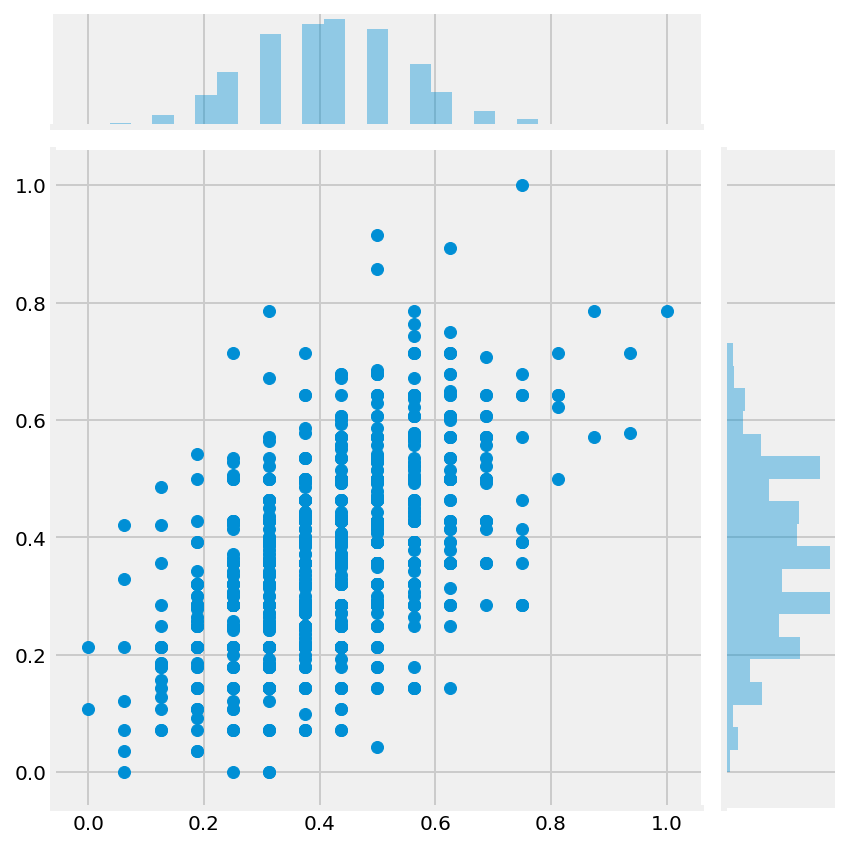

In [18]:
sns.jointplot(Xn[:,1], Xn[:,2])

<a id='independent-practice'></a>

## Independent Practice: Scaling the Wine Data Set

---

Below you'll load in the wine quality data set. This data set contains a variety of features for different types/brands of wine. 

**You should:**
1) Load and examine the data.
2) Create a target variable for wine quality.
3) Create a predictor matrix with the variables of your choice.
4) Create standardized and normalized versions of your predictor matrix.
5) Employing cross-validation, calculate the average $R^2$ score for wine quality using the original predictors, the standardized predictors, and the normalized predictors.

**1) Load and examine the data.**

In [19]:
wine = pd.read_csv('../datasets/winequality_merged.csv')

In [20]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [21]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red_wine                  int64
dtype: object

**2) Create a target variable for wine quality.**

In [23]:
quality = wine['quality'].values
wine['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

**3) Create a predictor matrix with variables of your choice.**

In [24]:
X = wine[['fixed acidity','residual sugar','sulphates','alcohol']]
X.head()

,fixed acidity,residual sugar,sulphates,alcohol
0,7.4,1.9,0.56,9.4
1,7.8,2.6,0.68,9.8
2,7.8,2.3,0.65,9.8
3,11.2,1.9,0.58,9.8
4,7.4,1.9,0.56,9.4


**4) Create a standardized and normalized version of your predictor matrix.**

In [25]:
ss = StandardScaler()
mms = MinMaxScaler()

Xs = ss.fit_transform(X)
Xn = mms.fit_transform(X)

In [26]:
print(X.shape, Xs.shape, Xn.shape)

(6497, 4) (6497, 4) (6497, 4)


**5) Employing cross-validation, calculate the average $R^2$ score for wine quality using the original predictors, the standardized predictors, and the normalized predictors.**

In [36]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

raw_r2 = cross_val_score(lr, X, quality, cv=10)
std_r2 = cross_val_score(lr, Xs, quality, cv=10)
norm_r2 = cross_val_score(lr, Xn, quality, cv=10)

print('Original mean CV-R2: {} (std {})'.format(round(np.mean(raw_r2),4), round(np.std(raw_r2),3)))
print('Standardized mean CV-R2: {} (std {})'.format(round(np.mean(std_r2),4), round(np.std(std_r2),3)))
print('Normalized mean CV-R2: {} (std {})'.format(round(np.mean(norm_r2),4), round(np.std(norm_r2),3)))

Original mean CV-R2: 0.187 (std 0.063)
Standardized mean CV-R2: 0.187 (std 0.063)
Normalized mean CV-R2: 0.187 (std 0.063)


<a id='resources'></a>

## Additional Resources

---

[About Feature Scaling and Normalization](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html)